In [3]:
%matplotlib inline

In [60]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import norm, uniform
# To hide warninigs
import warnings
warnings.filterwarnings('ignore')

In [30]:
my_dataframe = pd.read_csv("/Users/carolinahernandezoliver/carolinahernandez/UPF_2019_21/2/AST/AST_Advanced_Statistics_Subject/mydata.csv", header=[0], sep=",")


In [31]:
print(my_dataframe)

    Protein  Carbohydrates   Fat   ATP
0      1.95           6.92  0.02  9.44
1      0.64           2.65  0.15  4.04
2      1.82           0.98  0.21  3.72
3      1.80           4.69  0.23  7.54
4      0.93           4.22  0.02  5.70
..      ...            ...   ...   ...
94     1.83           5.69  0.15  8.60
95     1.77           6.33  0.07  8.66
96     1.15           4.88  0.27  6.80
97     1.30           3.91  0.03  5.46
98     0.56           0.90  0.16  2.15

[99 rows x 4 columns]


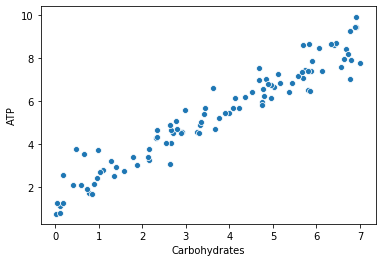

In [38]:
sns.scatterplot(my_dataframe["Carbohydrates"], my_dataframe["ATP"])

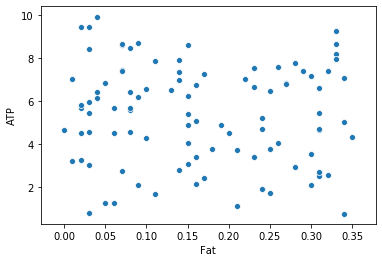

In [39]:
sns.scatterplot(my_dataframe["Fat"], my_dataframe["ATP"])

In [ ]:
sns.scatterplot(my_dataframe.index, my_dataframe.ATP, hue=my_dataframe.pathway)

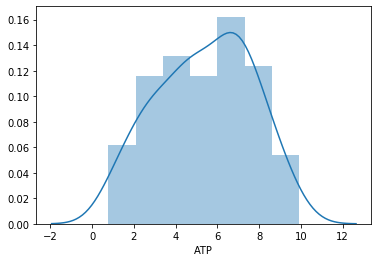

In [42]:
sns.distplot(my_dataframe["ATP"])

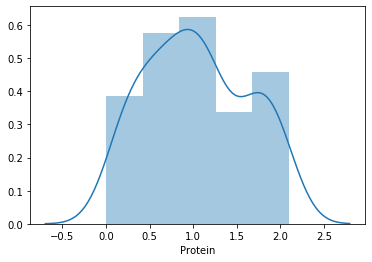

In [43]:
sns.distplot(my_dataframe["Protein"])

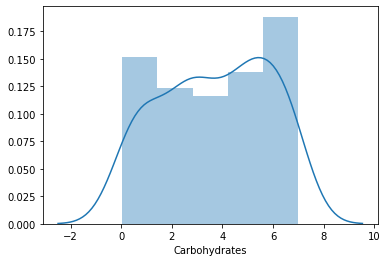

In [45]:
sns.distplot(my_dataframe.Carbohydrates)

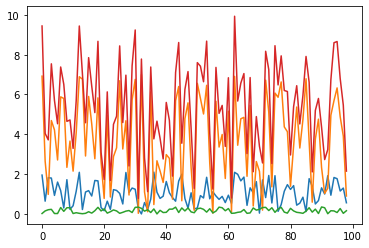

In [55]:
plt.plot(my_dataframe)

- Want to sample space by MC with METROPOLIS algorithm
- MC tends to be equal to the PROBABILITY DENSITY DISTRIBUTION that my RANDOM_VARIABLE is following.
- My RANDOM_VARIABLE is PROTEIN, CARBOHYDRATES and FAT.
- My PARAMETERS are A, B and C.

Stimating the STIMATED_PARAMETERS of a statistical MODEL given DATA_OBSERVATIONS by finding the PARAMETERS_VALUES that MAXIMIZE the likelihood of making the DATA_OBSERVATIONS given the PARAMETERS_VALUES

In [ ]:
# Parameters_values = [lambdaA,B,C]
# Stimated_Parameters = ["A", "B", "C"]
# Model = pm.Model()
# Data_observations = my_dataframe
# ATP = (A * my_dataframe.Protein) + (B * my_dataframe.Carbohydrates) + (C * my_dataframe.Fat) + e



In [ ]:
# Then I create my parametric model (making initial guesses)
with pm.Model() as model:
    # variable called model that stores the library pm
    # alphas are initial guesses, we dont know the realfinal values of them. To define them we put 1/mean just to start with
    # lambdas in our guess follow an exponential distribution. Object as exponential type. Where the parameter has the initial value of alpha 1
    # tau is the ATP. My real incognita in the problem. Where is the time tau standing in?.
    # We assign a discrete uniform distribution tau. We are not assigning any beliefs.
    # MY PARAMETERS are a, b and c.
    A = 1.0/my_dataframe.Protein.mean()  
    B = 1.0/my_dataframe.Carbohydrates.mean()
    C = 1.0/my_dataframe.Fat.mean()
    lambda_A = pm.Exponential("lambda_A", A)
    lambda_B = pm.Exponential("lambda_B", B)
    lambda_C = pm.Exponential("lambda_C", C)
    tau = pm.DiscreteUniform("tau", lower=0, upper=len(my_dataframe) - 1)

# This says that the random variable lambda_ is equal to lambda_1 if bigger than tau or lambda_2 otherwise
with model:
    # lambda_ will be a variable that if tau is bigger than idx, will be lambda_1. and if tau is les or equal than atp will be lambda 2.
    # at some atp we have the value of lambda_1 and afterwards the value of lambda_2. 2 posible values.
    
    atp = np.arange(len(my_dataframe)) # Index
    lambda_ = pm.math.switch(tau > atp, lambda_1, lambda_2)

# We add the observations to the model. To fulfill the model. Putting the data within our model.
# Poisson distribution with the parameter lambda.
with model:
    observation = pm.Poisson("obs", lambda_, observed=my_dataframe)

In [70]:
# Now is the moment to sample with MCMC and the Metropolis algorithm
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_C]
>Metropolis: [lambda_B]
>Metropolis: [lambda_A]
Sampling 2 chains, 0 divergences: 100%|██████████| 30000/30000 [00:18<00:00, 1588.46draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [76]:
# In the trace variable, I have a dictionary with the historical values of each one of the parameters
lambda_A_samples = trace['lambda_A']
lambda_B_samples = trace['lambda_B']
lambda_C_samples = trace['lambda_C']
tau_samples = trace['tau']

Text(0.5, 0, '$\\lambda_1$ value')

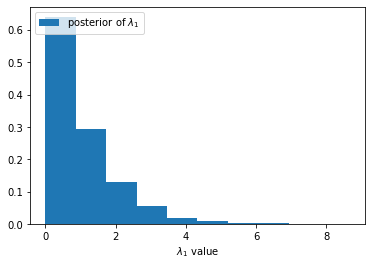

In [77]:
plt.hist(lambda_A_samples, label="posterior of $\lambda_1$", normed=True)
plt.legend(loc="upper left")
plt.xlabel("$\lambda_1$ value")

Text(0.5, 0, '$\\lambda_2$ value')

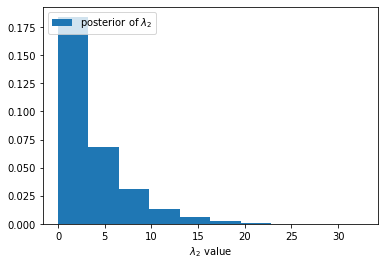

In [79]:
#histogram of the samples:

plt.hist(lambda_B_samples, label="posterior of $\lambda_2$", normed=True)
plt.legend(loc="upper left")
plt.xlabel("$\lambda_2$ value")

Text(0.5, 0, '$\tau$ value')

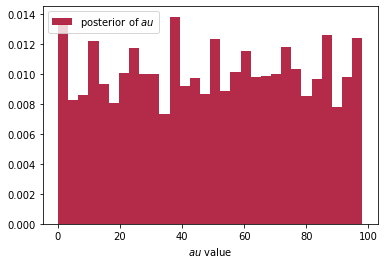

In [80]:
plt.hist(tau_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\tau$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.xlabel("$\tau$ value")